In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Carregando os dados a partir do csv
data = pd.read_csv("data/student-mat.csv")

In [6]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [9]:
data = data[["sex","age","freetime","traveltime","studytime","goout","famrel","G1","G2","G3","Walc","Dalc","address"]]

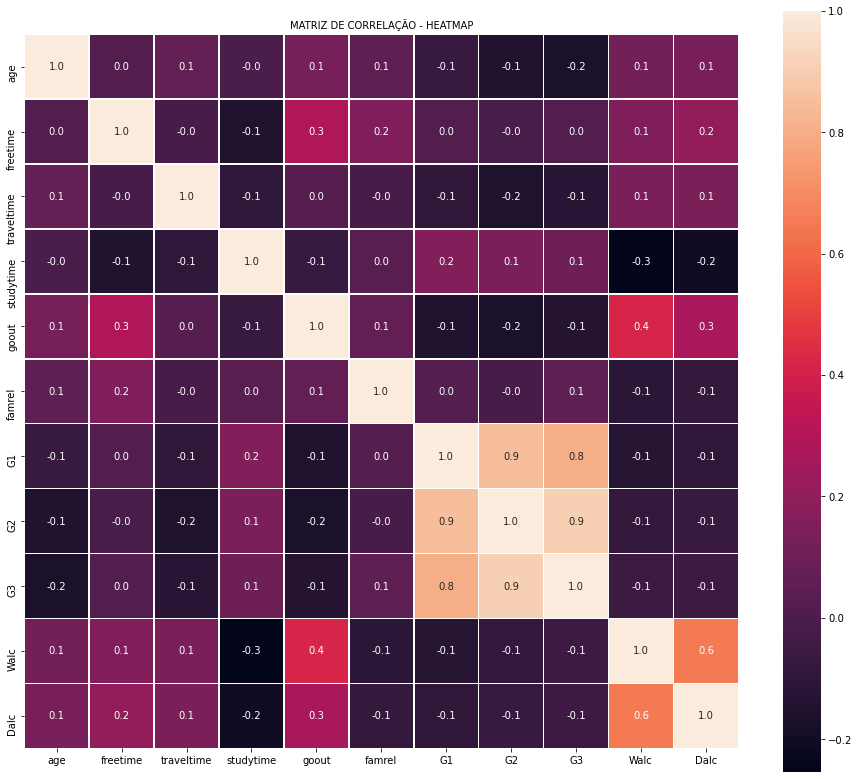

In [10]:
corr = data.corr() 
f,ax = plt.subplots(figsize=(16, 14))
sns.heatmap(corr, cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True, linewidths=.5, ax=ax)

plt.title('MATRIZ DE CORRELAÇÃO - HEATMAP', size=10);

In [11]:
pd.set_option('display.max_columns', None)
clean_data = pd.get_dummies(data, drop_first=True)

In [13]:
dalc = clean_data.copy()
walc = clean_data.copy()

dalc.loc[(dalc.Dalc < 2), 'Dalc' ] = 0 
dalc.loc[(dalc.Dalc >= 2), 'Dalc' ] = 1 

walc.loc[(walc.Walc < 2), 'Walc' ] = 0 
walc.loc[(walc.Walc >= 2), 'Walc' ] = 1

pd.set_option('display.max_columns', None)
clean_data = pd.get_dummies(data, drop_first=True)

In [43]:
dalc[dalc["Dalc"] == 1]

,age,freetime,traveltime,studytime,goout,famrel,G1,G2,G3,Walc,Dalc,sex_M,address_U
2,15,3,1,2,2,4,7,8,10,3,1,0,1
18,17,5,1,1,5,5,6,5,5,4,1,1,1
23,16,4,2,2,4,5,13,13,12,4,1,1,1
27,15,2,1,1,4,2,15,16,15,4,1,1,1
29,16,4,1,2,5,4,10,12,11,5,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,5,1,2,4,5,9,9,9,5,1,1,1
391,17,4,2,1,5,2,14,16,16,4,1,1,1
392,21,5,1,1,3,5,10,8,7,3,1,1,0
393,18,4,3,1,1,4,11,12,10,4,1,1,0


In [44]:
dalc[dalc["Dalc"] == 0]

,age,freetime,traveltime,studytime,goout,famrel,G1,G2,G3,Walc,Dalc,sex_M,address_U
0,18,3,2,2,4,4,5,6,6,1,0,0,1
1,17,3,1,2,3,5,5,5,6,1,0,0,1
3,15,2,1,3,2,3,15,14,15,1,0,0,1
4,16,3,1,2,2,4,6,10,10,2,0,0,1
5,16,4,1,2,2,5,15,15,15,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,19,3,2,1,2,4,6,5,0,3,0,1,0
385,18,3,2,3,3,5,10,9,10,3,0,0,0
387,19,4,1,3,2,5,7,5,0,2,0,0,0
388,18,3,1,2,4,4,7,9,8,1,0,0,1


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, ElasticNet, RidgeClassifierCV, LogisticRegression, Perceptron, PassiveAggressiveClassifier
from sklearn.linear_model import lasso_path, enet_path
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score, validation_curve
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz, DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

#import tensorflow as tf
import numpy as np
import itertools

In [17]:
data_model = dalc.drop('Walc', axis=1)
data_model_2 = walc.drop('Dalc', axis=1)

In [19]:
# Dividindo o conjunto

X = data_model.drop('Dalc', axis=1)
y = data_model['Dalc']

X_2 = data_model_2.drop('Walc', axis=1)
y_2 = data_model_2["Walc"]

In [47]:
y.value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      1
3      0
4      0
      ..
390    1
391    1
392    1
393    1
394    1
Name: Dalc, Length: 395, dtype: int64>

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
def clf_eval(clf, X, y_true, classes=['Não bebe', 'Bebe']):
    y_pred = clf.predict(X)
    clf_matrix = confusion_matrix(y_true, y_pred)
    #print('Classification Report')
    #print(classification_report(y_true, y_pred, target_names=classes))
    #print('ROC Score: {}'.format(roc_auc_score(y_true, y_pred)))
    #print('Accuracy Score: {}'.format(accuracy_score(y_true, y_pred)))
    #print('Average Precision Score: {}'.format(average_precision_score(y_true, y_pred)))
    #print('f1 Score: {}'.format(f1_score(y_true, y_pred)))
    #plott = plot_confusion_matrix(clf_matrix, classes=classes)
    plot_confusion_matrix(clf_matrix, classes=classes)
    return [roc_auc_score(y_true, y_pred)] #, plott]

In [24]:
#Para o Dalc---------------------------------------------------------------------------------------
robust_scaler = RobustScaler()
X1 = robust_scaler.fit_transform(X)
X1 = pd.DataFrame(X1, columns = X.columns)

#pca = PCA(30)
#pca_X = pca.fit(X1)

#X_pca = pd.DataFrame(pca_X.transform(X1))
#X_pca.head()

Confusion matrix, without normalization
[[54  9]
 [ 8  8]]


[0.6785714285714286]

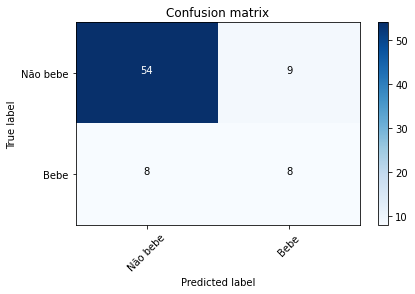

In [32]:
#RIDGE CLASSIFIER
X_train, X_test, Y_train, Y_test = train_test_split(X1,y, test_size=0.2, random_state = 0)      #X_pca, y, test_size=0.2)#, random_state=semente)
ridgecv = RidgeClassifierCV().fit(X_train, Y_train)
y_pred_ = ridgecv.predict(X_test)
ridgecv.score(X_test, Y_test)
clf_eval(ridgecv, X_test, Y_test)

Confusion matrix, without normalization
[[52 11]
 [ 8  8]]


[0.6626984126984127]

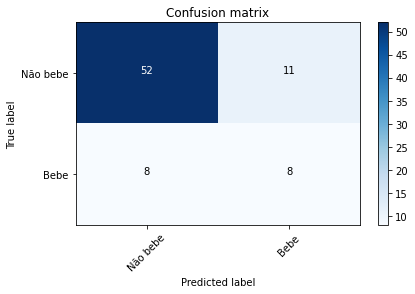

In [33]:
#REGRESSÃO LOGÍSTICA
logisR = LogisticRegression().fit(X_train, Y_train)
y_pred = logisR.predict(X_test)
logisR.score(X_test, Y_test)
clf_eval(logisR, X_test, Y_test)


Confusion matrix, without normalization
[[30 33]
 [ 7  9]]


[0.519345238095238]

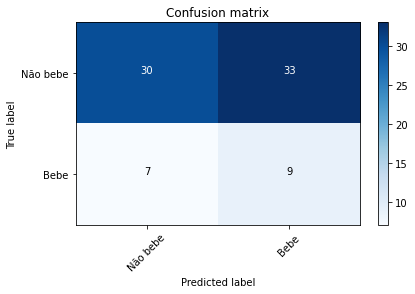

In [34]:
#PERCEPTRON
percep = Perceptron().fit(X_train, Y_train)
y_pred = percep.predict(X_test)
percep.score(X_test, Y_test)
clf_eval(percep, X_test, Y_test)

Confusion matrix, without normalization
[[43 20]
 [11  5]]


[0.4975198412698413]

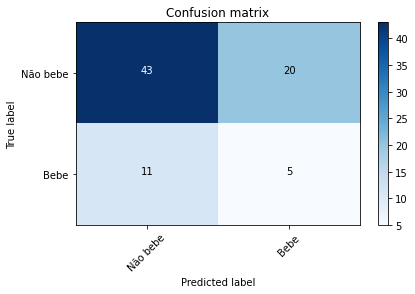

In [35]:
#PASSIVE AGRESSIVE ALGORITHM
PAC = PassiveAggressiveClassifier().fit(X_train,Y_train)
y_pred = PAC.predict(X_test)
PAC.score(X_test, Y_test)
clf_eval(PAC, X_test, Y_test)

Confusion matrix, without normalization
[[39 24]
 [ 9  7]]


[0.5282738095238095]

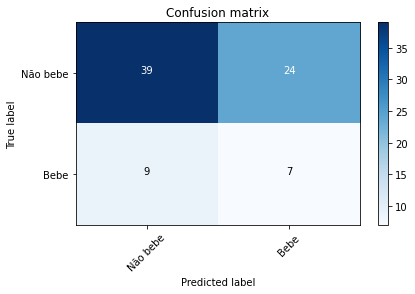

In [36]:
#DECISION TREE
DTC = DecisionTreeClassifier().fit(X_train,Y_train)
y_pred = DTC.predict(X_test)
DTC.score(X_test, Y_test)
clf_eval(DTC, X_test, Y_test)

Confusion matrix, without normalization
[[53 10]
 [11  5]]


[0.5768849206349207]

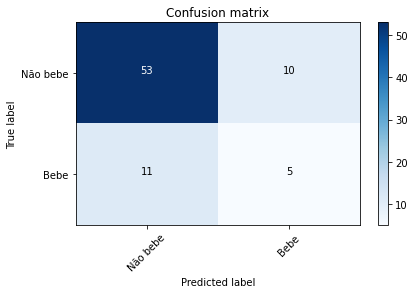

In [38]:
#RANDOM FOREST
RFC = RandomForestClassifier().fit(X_train,Y_train)
y_pred = RFC.predict(X_test)
RFC.score(X_test, Y_test)
clf_eval(RFC, X_test, Y_test)